In [68]:
from pymongo import MongoClient
client=MongoClient()
db=client.flight_data
collection_1=db.flight_data_collection
import datetime 
import pandas as pd 

def from_unix_timestamp(val):
     #print("Date=", val)
     if (val is None):
         return datetime.datetime.fromtimestamp(0)
     if(val!=0):
      return datetime.datetime.fromtimestamp(val)

In [69]:
print(collection_1.find()[0])


{'_id': ObjectId('58b64d7e566f5d11bce4ac92'), 'aircraft': {'model': {'code': 'A320', 'text': 'Airbus A320-232'}, 'hex': '800AF3', 'registration': 'VT-IAL', 'serialNo': None, 'age': {'availability': True}, 'restricted': False, 'availability': {'serialNo': True, 'age': True}}, 'airline': {'name': 'IndiGo', 'short': 'IndiGo Airlines', 'code': {'iata': '6E', 'icao': 'IGO'}}, 'airport': {'origin': {'name': 'Mumbai Chhatrapati Shivaji International Airport', 'code': {'iata': 'BOM', 'icao': 'VABB'}, 'position': {'latitude': 19.08868, 'longitude': 72.867912, 'country': {'name': 'India', 'code': 'IN'}, 'region': {'city': 'Mumbai'}}, 'timezone': {'name': 'Asia/Kolkata', 'offset': 19800, 'abbr': 'IST', 'abbrName': 'India Standard Time', 'isDst': False}, 'visible': True}, 'destination': {'name': 'Delhi Indira Gandhi International Airport', 'code': {'iata': 'DEL', 'icao': 'VIDP'}, 'position': {'latitude': 28.5665, 'longitude': 77.103081, 'country': {'name': 'India', 'code': 'IN'}, 'region': {'city'

In [24]:
from geopy.distance import vincenty
a=x['airport']["origin"]['position']['latitude']
b=x['airport']['origin']['position']['longitude']
m=(a,b)
c=x['airport']['destination']['position']['latitude']
d=x['airport']['destination']['position']['longitude']
n=(c,d)
z=vincenty(m,n)
print(type(z))
print(z)


TypeError: list indices must be integers or slices, not str

In [83]:
flight_number=[]
status_text=[]
origin=[]
destination=[]
scheduled_departure=[]
scheduled_arrival=[]
real_departure=[]
real_arrival=[]
estimated_departure=[]
estimated_arrival=[]
duration=[]
timestamp=[]
for item in collection_1.find()[0:50]:
    if item['identification']['number']['default']==None:
        flight_number.append("None")
    else:
        flight_number.append(item['identification']['number']['default'])
    if item['status']['text']==None:
        status_text.append("None")
    else:
        status_text.append(item['status']['text'])
    if item['airport']['origin']==None:
        origin.append("None")
    else:
        origin.append(item['airport']['origin']['name'])
    if item['airport']['destination']==None:
        destination.append("None")
    else:
        destination.append(item['airport']['destination']['name'])
    if item['time']['estimated']['arrival']==None:
        estimated_arrival.append("None")
    else:
        estimated_arrival.append(item['time']['estimated']['arrival'])
    if item['time']['estimated']['departure']==None:
        estimated_departure.append("None")
    else:
        estimated_departure.append(from_unix_timestamp(item['time']['estimated']['departure']))
    if item['time']['scheduled']['arrival']==None:
        scheduled_arrival.append('None')
    else:
        scheduled_arrival.append(from_unix_timestamp(item['time']['scheduled']['arrival']))
    if item['time']['scheduled']['departure']==None:
        scheduled_departure.append('None')
    else:
        scheduled_departure.append(from_unix_timestamp(item['time']['scheduled']['departure']))
    if item['time']['real']['arrival']==None:
        real_arrival.append('None')
    else:
        real_arrival.append(from_unix_timestamp(item['time']['real']['arrival']))
    if item['time']['real']['departure']==None:
        real_departure.append('None')
    else:
        real_departure.append(from_unix_timestamp(item['time']['real']['departure']))
    if item['time']['other']['duration']==None:
        duration.append("None")
    else:
        duration.append(item['time']['other']['duration'])
    timestamp.append(item['_id'].generation_time)
        

In [84]:
import pandas as pd 

df=pd.DataFrame({"timestamp":timestamp,"origin":origin,"destination":destination,"estimated_arrival":estimated_arrival,"estimated_departure":
                estimated_departure,"real_arrival":real_arrival,"real_departure":real_departure,"scheduled_arrival":scheduled_arrival,"scheduled_departure":
                scheduled_departure,"flight_number":flight_number,"status":status_text,"duration":duration})

df=df[["timestamp","flight_number","origin","destination","scheduled_departure","scheduled_arrival","estimated_departure","estimated_arrival",
      "real_departure","real_arrival","status","duration"]]

In [85]:
df.head()

,timestamp,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration
0,2017-03-01 04:26:38+00:00,6E198,Mumbai Chhatrapati Shivaji International Airport,Delhi Indira Gandhi International Airport,2017-03-01 22:15:00,2017-03-02 00:25:00,2017-03-01 22:15:00,None,None,None,Estimated dep 22:15,7500
1,2017-03-01 04:26:38+00:00,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-03-01 19:30:00,2017-03-01 21:40:00,2017-03-01 19:30:00,None,None,None,Estimated dep 19:30,7200
2,2017-03-01 04:26:38+00:00,6E5409,Indore Devi Ahilyabai Holkar Airport,Delhi Indira Gandhi International Airport,2017-03-01 16:50:00,2017-03-01 18:20:00,2017-03-01 16:50:00,None,None,None,Estimated dep 16:50,5700
3,2017-03-01 04:26:38+00:00,6E4651,Mumbai Chhatrapati Shivaji International Airport,Indore Devi Ahilyabai Holkar Airport,2017-03-01 14:45:00,2017-03-01 16:10:00,2017-03-01 14:45:00,None,None,None,Estimated dep 14:45,4500
4,2017-03-01 04:26:38+00:00,6E3904,Indore Devi Ahilyabai Holkar Airport,Mumbai Chhatrapati Shivaji International Airport,2017-03-01 12:55:00,2017-03-01 14:10:00,2017-03-01 12:55:00,None,None,None,Estimated dep 12:55,4800


In [72]:
#Function for extracting useful information from the database 

def extract(collection):
    from geopy.distance import vincenty
    import pandas as pd 
    flight_number=[]
    status_text=[]
    origin=[]
    destination=[]
    scheduled_departure=[]
    scheduled_arrival=[]
    real_departure=[]
    real_arrival=[]
    estimated_departure=[]
    estimated_arrival=[]
    duration=[]
    timestamp=[]
    distance_travelled=[]
    country_origin=[]
    country_destination=[]
    airline_name=[]
    registration=[]
    for item in collection:
        if item['airport']['origin']==None or item['airport']['destination']==None:
            distance_travelled.append("0 km")
        else:
            n=(item['airport']['destination']['position']['latitude'],item['airport']['destination']['position']['longitude'])
            m=(item['airport']["origin"]['position']['latitude'],item['airport']['origin']['position']['longitude'])
            distance_travelled.append((vincenty(m,n)))
            #country.append(item['airport']['origin']['position']['country']['name'])
            
        if item['identification']['number']['default']==None:
            flight_number.append("None")
        else:
            flight_number.append(item['identification']['number']['default'])
        if item['status']['text']==None:
            status_text.append("None")
        else:
            status_text.append(item['status']['text'])
        if item['airport']['origin']==None:
            origin.append("None")
            country_origin.append("None")
            #distance_travelled.append('None')
        else:
            origin.append(item['airport']['origin']['name'])
            country_origin.append(item['airport']['origin']['position']['country']['name'])
            #m=(item['airport']["origin"]['position']['latitude'],item['airport']['origin']['position']['longitude'])
            #n=(item['airport']['destination']['position']['latitude'],item['airport']['destination']['position']['longitude'])
            #distance_travelled.append((vincenty(m,n)))
            
        if item['airport']['destination']==None:
            destination.append("None")
            country_destination.append("None")
        else:
            destination.append(item['airport']['destination']['name'])
            country_destination.append(item['airport']['destination']['position']['country']['name'])
        if item['time']['estimated']['arrival']==None:
            estimated_arrival.append("None")
        else:
            estimated_arrival.append(item['time']['estimated']['arrival'])
        if item['time']['estimated']['departure']==None:
            estimated_departure.append("None")
        else:
            estimated_departure.append(from_unix_timestamp(item['time']['estimated']['departure']))
        if item['time']['scheduled']['arrival']==None:
            scheduled_arrival.append('None')
        else:
            scheduled_arrival.append(from_unix_timestamp(item['time']['scheduled']['arrival']))
        if item['time']['scheduled']['departure']==None:
            scheduled_departure.append('None')
        else:
            scheduled_departure.append(from_unix_timestamp(item['time']['scheduled']['departure']))
        if item['time']['real']['arrival']==None:
            real_arrival.append('None')
        else:
            real_arrival.append(from_unix_timestamp(item['time']['real']['arrival']))
        if item['time']['real']['departure']==None:
            real_departure.append('None')
        else:
            real_departure.append(from_unix_timestamp(item['time']['real']['departure']))
        # New added code
        if item['aircraft']['registration']==None:
            registration.append("None")
        else:
            registration.append(item['aircraft']['registration'])
        if item['airline']==None or item['airline']['name']==None:
            airline_name.append("None")
        else:
            airline_name.append(item['airline']['name'])
        if item['time']['other']['duration']==None:
            duration.append("None")
        else:
            duration.append(item['time']['other']['duration'])
        timestamp.append(item['_id'].generation_time)
        
    df=pd.DataFrame({"timestamp":timestamp,"origin":origin,"destination":destination,"estimated_arrival":estimated_arrival,"estimated_departure":
                estimated_departure,"real_arrival":real_arrival,"real_departure":real_departure,"scheduled_arrival":scheduled_arrival,"scheduled_departure":
                scheduled_departure,"flight_number":flight_number,"status":status_text,"duration":duration,"distance_travelled":distance_travelled,
                    "country_origin":country_origin,"country_dest":country_destination,"reg":registration,"airline_name":airline_name})

    df=df[["timestamp","reg","airline_name","country_origin","country_dest","flight_number","origin","destination","scheduled_departure","scheduled_arrival","estimated_departure","estimated_arrival",
      "real_departure","real_arrival","status","duration","distance_travelled"]]
    
    return df
        
    

In [73]:
k=extract(collection_1.find())

In [61]:
#k.to_csv("final_data.csv",sep=',')

In [90]:
#type(k.to_dict('records'))


In [75]:
k.shape

(339037, 17)

In [76]:
k[k.flight_number=="6E197"]

,timestamp,reg,airline_name,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration,distance_travelled
1,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-03-01 19:30:00,2017-03-01 21:40:00,2017-03-01 19:30:00,None,None,None,Estimated dep 19:30,7200,1134.665151108713 km
57,2017-03-01 04:27:01+00:00,VT-IAL,IndiGo,India,India,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-03-01 19:30:00,2017-03-01 21:40:00,2017-03-01 19:30:00,None,None,None,Estimated dep 19:30,7200,1134.665151108713 km
119,2017-03-01 04:27:13+00:00,VT-IAN,IndiGo,India,India,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 19:30:00,2017-02-28 21:40:00,None,None,2017-02-28 19:44:39,2017-02-28 21:30:00,Landed 21:30,6361,1134.665151108713 km
1138,2017-03-01 04:30:54+00:00,VT-IDM,IndiGo,India,India,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-26 19:30:00,2017-02-26 21:40:00,None,None,2017-02-26 19:42:47,2017-02-26 21:28:00,Landed 21:28,6331,1134.665151108713 km
2444,2017-03-01 04:35:37+00:00,VT-IEL,IndiGo,India,India,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-27 19:30:00,2017-02-27 21:40:00,None,None,2017-02-27 21:11:57,2017-02-27 22:59:00,Landed 22:59,6463,1134.665151108713 km
2676,2017-03-01 04:36:23+00:00,VT-IEP,IndiGo,India,India,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-23 19:30:00,2017-02-23 21:40:00,None,None,2017-02-23 20:02:03,2017-02-23 21:46:37,Landed 21:46,6274,1134.665151108713 km
4928,2017-03-01 04:44:06+00:00,VT-IGK,IndiGo,India,India,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-22 19:30:00,2017-02-22 21:40:00,None,None,2017-02-22 19:35:29,2017-02-22 21:30:51,Landed 21:30,6922,1134.665151108713 km
5404,2017-03-01 04:45:51+00:00,VT-IGZ,IndiGo,India,India,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-25 19:30:00,2017-02-25 21:40:00,None,None,2017-02-25 19:34:16,2017-02-25 21:12:00,Landed 21:12,5895,1134.665151108713 km
5839,2017-03-01 05:34:56+00:00,VT-IAL,IndiGo,India,India,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-03-01 19:30:00,2017-03-01 21:40:00,2017-03-01 19:30:00,None,None,None,Estimated dep 19:30,7200,1134.665151108713 km
5901,2017-03-01 05:35:07+00:00,VT-IAN,IndiGo,India,India,6E197,Delhi Indira Gandhi International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 19:30:00,2017-02-28 21:40:00,None,None,2017-02-28 19:44:39,2017-02-28 21:30:00,Landed 21:30,6361,1134.665151108713 km


### Data preprocessing - removing rows with missing values

In [77]:
data=k[k.scheduled_arrival!="None"]
data=data[data.real_arrival!="None"]
data=data[data.real_departure!='None']
data=data[data.scheduled_departure!='None']

In [78]:
new_data=data.drop_duplicates(subset=["flight_number","origin","destination","scheduled_departure","scheduled_arrival",
                                     "real_departure","real_arrival","status"])

In [79]:
new_data.shape

(52743, 17)

In [80]:
new_data.head()

,timestamp,reg,airline_name,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration,distance_travelled
7,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E732,Hyderabad Rajiv Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-03-01 06:25:00,2017-03-01 08:25:00,None,None,2017-03-01 06:31:37,2017-03-01 08:03:00,Landed 08:03,5524,1082.7558529029552 km
8,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E6216,Lucknow Chaudhary Charan Singh Airport,Hyderabad Rajiv Gandhi International Airport,2017-02-28 21:00:00,2017-02-28 22:55:00,None,None,2017-02-28 20:56:07,2017-02-28 22:31:00,Landed 22:32,5787,1082.7558529029552 km
9,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E5156,Delhi Indira Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-02-28 19:20:00,2017-02-28 20:30:00,None,None,2017-02-28 19:29:33,2017-02-28 20:13:00,Landed 20:13,2665,423.7601185098625 km
10,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E174,Mumbai Chhatrapati Shivaji International Airport,Delhi Indira Gandhi International Airport,2017-02-28 16:30:00,2017-02-28 18:40:00,None,None,2017-02-28 16:49:10,2017-02-28 18:23:00,Landed 18:23,5660,1134.6651511087132 km
11,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E176,Trivandrum International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 10:15:00,2017-02-28 12:15:00,None,None,2017-02-28 11:22:52,2017-02-28 13:11:00,Landed 13:11,6517,1252.3895747521426 km


In [203]:
# writing to csv , uncomment the code for the same 
#new_data.to_csv("refined_data.csv")

In [81]:
new_data.dtypes

timestamp              datetime64[ns, <bson.tz_util.FixedOffset objec...
reg                                                               object
airline_name                                                      object
country_origin                                                    object
country_dest                                                      object
flight_number                                                     object
origin                                                            object
destination                                                       object
scheduled_departure                                               object
scheduled_arrival                                                 object
estimated_departure                                               object
estimated_arrival                                                 object
real_departure                                                    object
real_arrival                                       

In [82]:
new_data["scheduled_departure"]=pd.to_datetime(new_data.scheduled_departure)
new_data['scheduled_arrival']=pd.to_datetime(new_data.scheduled_arrival)
new_data['real_arrival']=pd.to_datetime(new_data.real_arrival)
new_data['real_departure']=pd.to_datetime(new_data.real_departure)

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [83]:
new_data.dtypes

timestamp              datetime64[ns, <bson.tz_util.FixedOffset objec...
reg                                                               object
airline_name                                                      object
country_origin                                                    object
country_dest                                                      object
flight_number                                                     object
origin                                                            object
destination                                                       object
scheduled_departure                                       datetime64[ns]
scheduled_arrival                                         datetime64[ns]
estimated_departure                                               object
estimated_arrival                                                 object
real_departure                                            datetime64[ns]
real_arrival                                       

In [84]:
new_data["arrival_delay"]=(new_data['real_arrival']-new_data['scheduled_arrival']).astype('timedelta64[m]')
new_data['departure_delay']=(new_data['real_departure']-new_data['scheduled_departure']).astype('timedelta64[m]')

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [88]:
new_data.head()

,timestamp,reg,airline_name,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,...,real_departure,real_arrival,status,duration,distance_travelled,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep
7,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E732,Hyderabad Rajiv Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-03-01 06:25:00,2017-03-01 08:25:00,...,2017-03-01 06:31:37,2017-03-01 08:03:00,Landed 08:03,5524,1082.7558529029552 km,-22.0,6.0,6,Wednesday,1
8,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E6216,Lucknow Chaudhary Charan Singh Airport,Hyderabad Rajiv Gandhi International Airport,2017-02-28 21:00:00,2017-02-28 22:55:00,...,2017-02-28 20:56:07,2017-02-28 22:31:00,Landed 22:32,5787,1082.7558529029552 km,-24.0,-4.0,21,Tuesday,28
9,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E5156,Delhi Indira Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-02-28 19:20:00,2017-02-28 20:30:00,...,2017-02-28 19:29:33,2017-02-28 20:13:00,Landed 20:13,2665,423.7601185098625 km,-17.0,9.0,19,Tuesday,28
10,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E174,Mumbai Chhatrapati Shivaji International Airport,Delhi Indira Gandhi International Airport,2017-02-28 16:30:00,2017-02-28 18:40:00,...,2017-02-28 16:49:10,2017-02-28 18:23:00,Landed 18:23,5660,1134.6651511087132 km,-17.0,19.0,16,Tuesday,28
11,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,India,India,6E176,Trivandrum International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 10:15:00,2017-02-28 12:15:00,...,2017-02-28 11:22:52,2017-02-28 13:11:00,Landed 13:11,6517,1252.3895747521426 km,56.0,67.0,10,Tuesday,28


In [86]:
new_data["hour_dep"]=new_data.scheduled_departure.dt.hour
new_data["weekday_dep"]=new_data.scheduled_departure.dt.weekday_name
new_data["day_of_month_dep"]=new_data.scheduled_departure.dt.day


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

### Duration of collected dataset 

In [159]:
print("MAXIMUM TIMESTAMP IN DATASET:")
print(new_data.scheduled_departure.max())
print("\n")
print("MINIMUM TIMESTAMP IN DATASET:")
print(new_data.scheduled_departure.min())

MAXIMUM TIMESTAMP IN DATASET:
2017-03-15 10:40:00


MINIMUM TIMESTAMP IN DATASET:
2017-02-22 00:55:00


In [145]:
#Shape of datafarme
new_data.shape
#new_data.to_csv("refined_data.csv")

(52743, 22)

In [136]:
new_data.describe(include=["object"])

,reg,airline_name,country_origin,country_dest,flight_number,origin,destination,estimated_departure,estimated_arrival,status,duration,distance_travelled,weekday_dep
count,52743,52743,52743,52743,52743,52743,52743,52743,52743,52743,52743,52743,52743
unique,444,13,33,30,2310,108,104,1,1,1440,12011,52718,7
top,VT-BLR,IndiGo,India,India,6E339,Delhi Indira Gandhi International Airport,Delhi Indira Gandhi International Airport,None,None,Landed 10:37,3060,0 km,Thursday
freq,188,18998,48705,48680,115,10118,10128,52743,52743,88,202,26,8821


In [95]:
# removing international flights 

new_data_domestic=new_data[(new_data.country_origin=="India") & (new_data.country_dest=="India")]

In [119]:
new_data_domestic.shape
del new_data_domestic["timestamp"]
#new_data_domestic.to_csv("all_domestic.csv")

In [139]:
qwe=new_data_domestic.drop_duplicates(subset=["flight_number","origin","destination","scheduled_departure","scheduled_arrival",
                                     "real_departure","real_arrival","status"])

In [140]:
qwe.shape

(44771, 21)

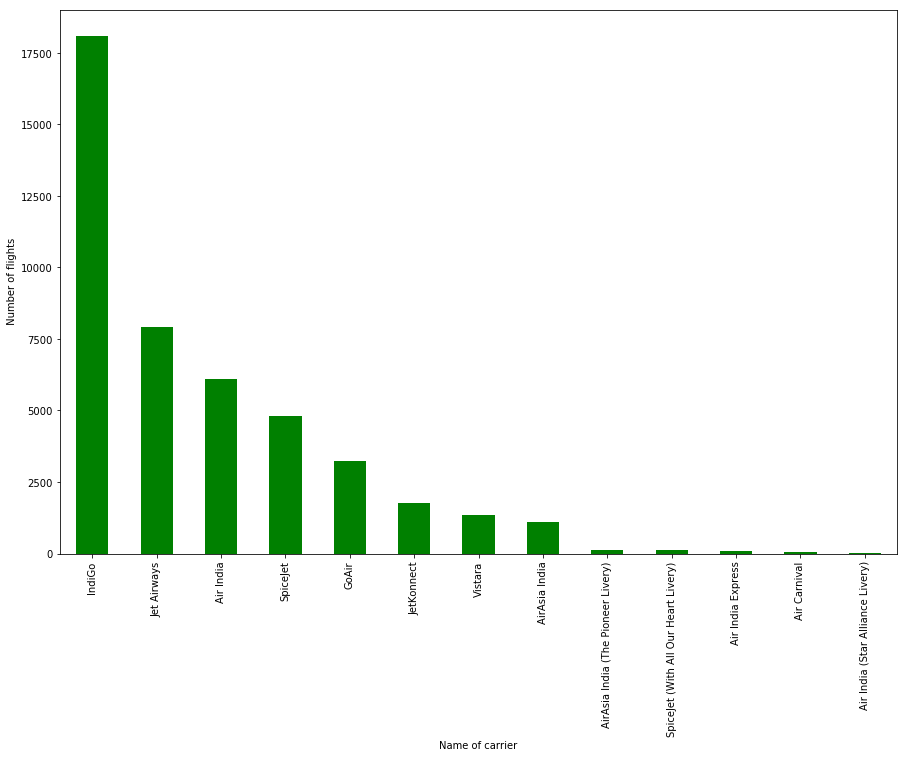

In [158]:
qwe.airline_name.value_counts(normalize=False).plot(kind="Bar",figsize=(15,10),color="g")
plt.ylabel(" Number of flights")
plt.xlabel("Name of carrier")

In [113]:
#filtering out delayed flights,if arrival_delay is greater than 0 , it is considered delayed 

delayed_flights_0_min=new_data_domestic[new_data_domestic.arrival_delay>0]
delayed_flights_0_min.to_csv("delayed_flight_final.csv")

In [98]:
#Printing the shape of delayed flight 


delayed_flights_0_min.shape

(17774, 22)

In [99]:
# importing libraries for plotting 

import matplotlib.pyplot as plt 
%matplotlib inline
del delayed_flights_0_min['timestamp']

In [100]:
# Checking the structure of dataset 

delayed_flights_0_min.head()

,reg,airline_name,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,...,real_departure,real_arrival,status,duration,distance_travelled,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep
11,VT-IAL,IndiGo,India,India,6E176,Trivandrum International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 10:15:00,2017-02-28 12:15:00,None,...,2017-02-28 11:22:52,2017-02-28 13:11:00,Landed 13:11,6517,1252.3895747521426 km,56.0,67.0,10,Tuesday,28
18,VT-IAL,IndiGo,India,India,6E238,Ahmedabad International Airport,Chennai International Airport,2017-02-27 09:55:00,2017-02-27 12:10:00,None,...,2017-02-27 10:18:32,2017-02-27 12:24:00,Landed 12:24,7564,1371.7036839622774 km,14.0,23.0,9,Monday,27
20,VT-IAL,IndiGo,India,India,6E238,Kolkata International Airport,Jaipur Airport,2017-02-27 05:20:00,2017-02-27 07:25:00,None,...,2017-02-27 05:23:10,2017-02-27 07:35:00,Landed 07:44,8474,1358.1577783850107 km,10.0,3.0,5,Monday,27
30,VT-IAL,IndiGo,India,India,6E6493,Bangalore Kempegowda International Airport,Kolkata International Airport,2017-02-25 18:15:00,2017-02-25 20:40:00,None,...,2017-02-25 18:46:18,2017-02-25 20:57:00,Landed 21:00,8076,1544.731830735519 km,17.0,31.0,18,Saturday,25
36,VT-IAL,IndiGo,India,India,6E963,Delhi Indira Gandhi International Airport,Bangalore Kempegowda International Airport,2017-02-24 19:45:00,2017-02-24 22:30:00,None,...,2017-02-24 19:59:29,2017-02-24 22:32:33,Landed 22:32,9184,1702.6538858818212 km,2.0,14.0,19,Friday,24


## Descriptive statistics for "arrival_delay" variable

In [151]:
print("Average arrival delay across all airports:{}".format(delayed_flights_0_min.arrival_delay.mean()))
print("Median arrival delay across all airports:{}".format(delayed_flights_0_min.arrival_delay.median()))
print("Standard deviation of the arrival delay :{}".format(delayed_flights_0_min.arrival_delay.std()))

Average arrival delay across all airports:24.687183526499382
Median arrival delay across all airports:15.0
Standard deviation of the arrival delay :32.22599851127575


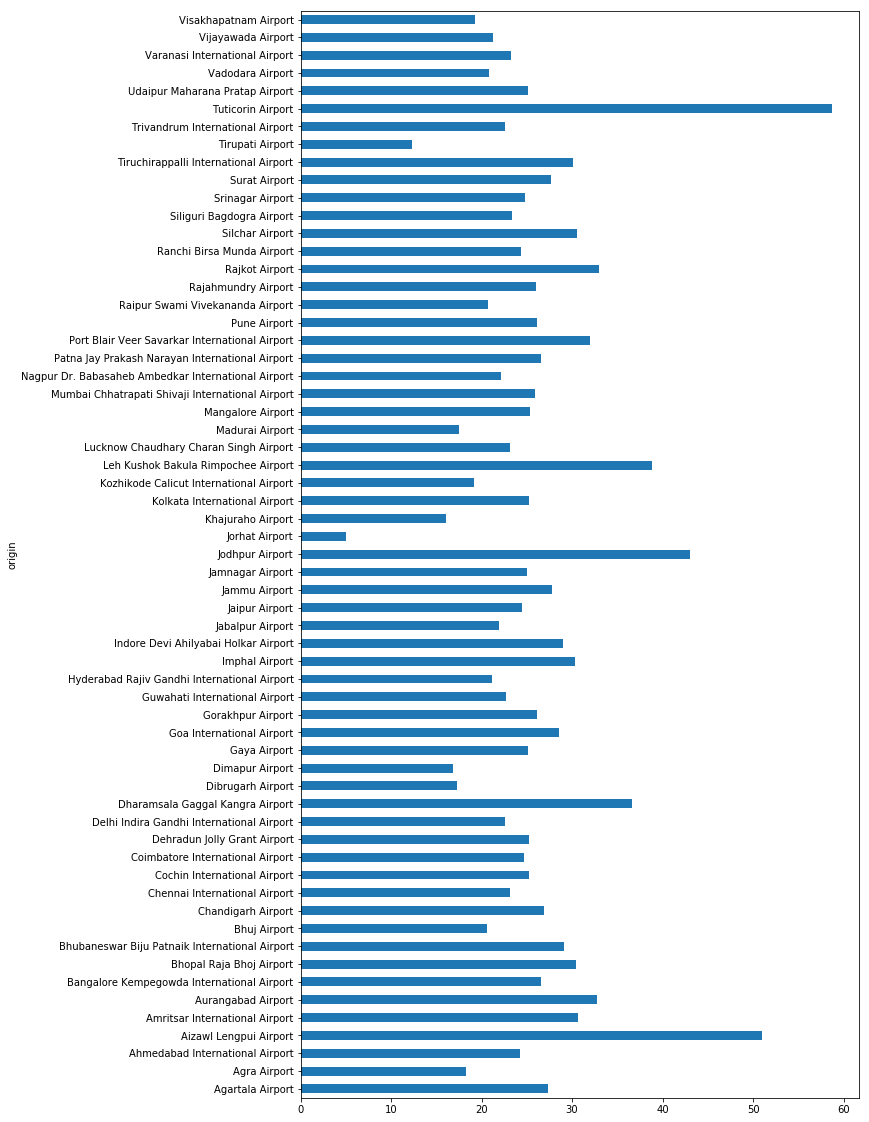

In [125]:
delayed_flights_0_min.groupby("origin").arrival_delay.mean().plot(kind="barh",figsize=(10,20))

# Average arrival delay on hourly basis

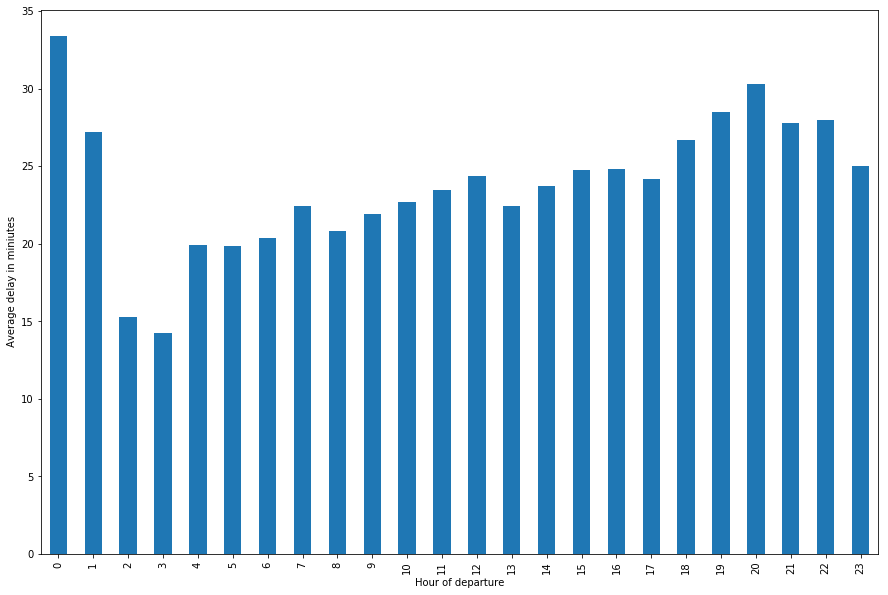

In [102]:
delayed_flights_0_min.groupby("hour_dep").arrival_delay.mean().plot(kind="bar",figsize=(15,10))
plt.xlabel("Hour of departure")
plt.ylabel(" Average delay in miniutes")

# Average arrival delay based on weekdays

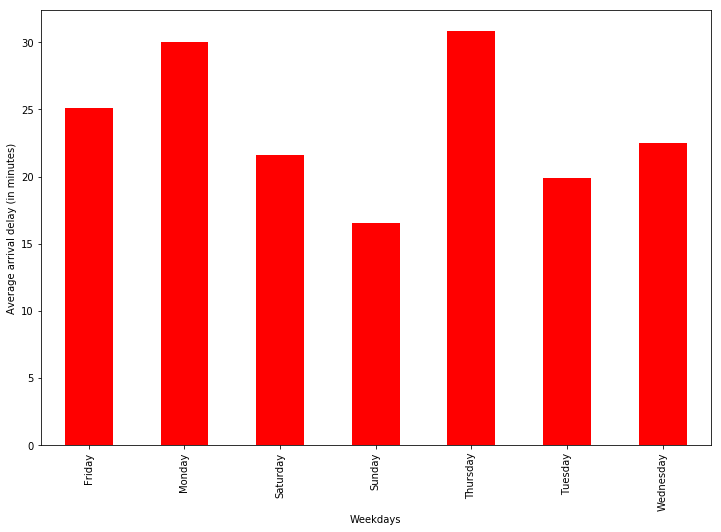

In [103]:
delayed_flights_0_min.groupby("weekday_dep").arrival_delay.mean().plot(kind="bar",figsize=(12,8),color="r")
plt.ylabel("Average arrival delay (in minutes)")
plt.xlabel("Weekdays")

In [133]:
delayed_stats=delayed_flights_0_min.groupby('airline_name').arrival_delay.agg(["mean","median"])

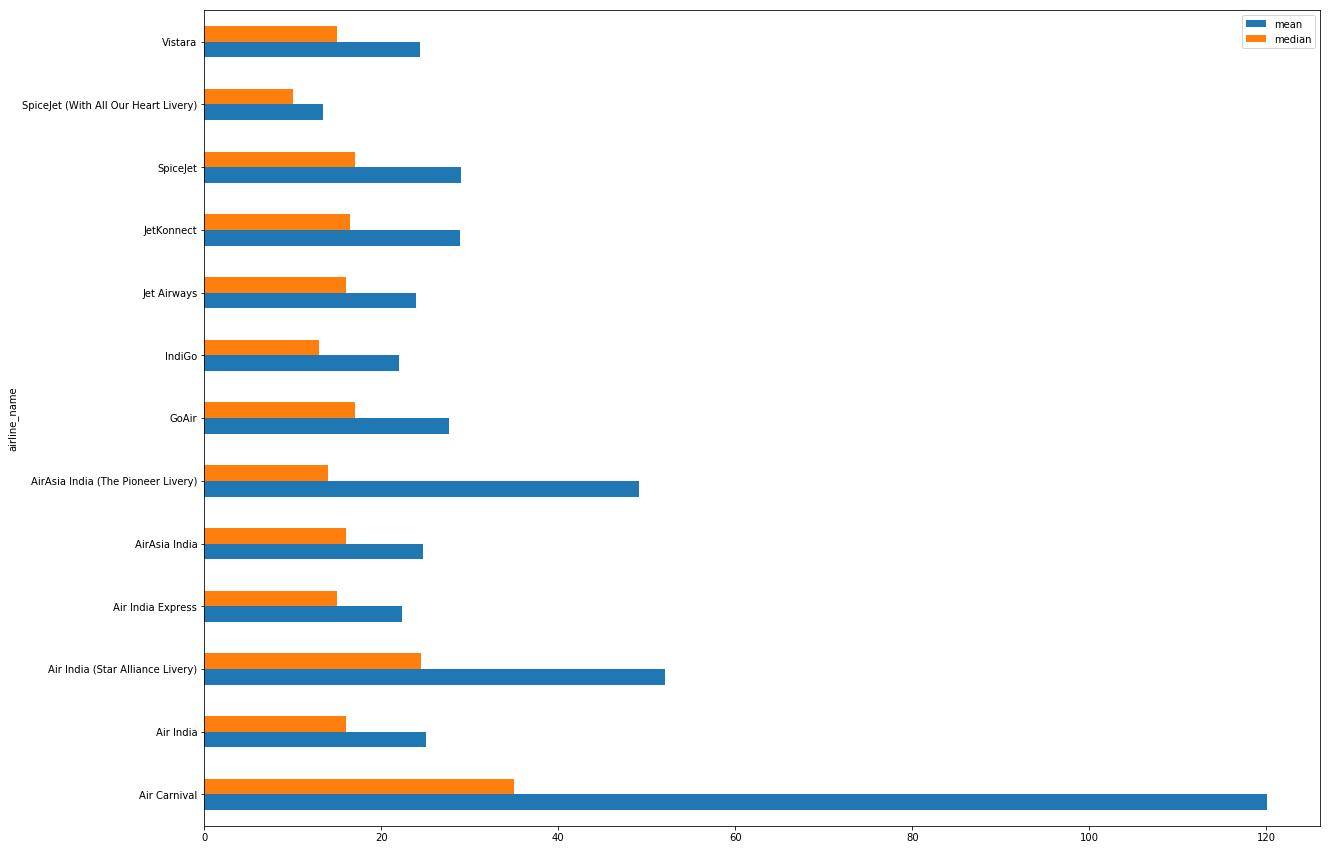

In [135]:

delayed_stats.plot(kind='barh',figsize=(20,15))

### Average delay by  registration number 

In [111]:
delayed_flights_0_min.groupby("reg").arrival_delay.mean().sort_values(ascending=False)

reg
VT-CMA    120.085714
VT-AXQ    104.500000
VT-ESF     89.666667
VT-JCL     83.769231
VT-JCT     67.941176
VT-ANV     66.666667
VT-SZJ     63.166667
VT-SUP     57.500000
VT-SPK     56.294118
VT-INY     54.647059
VT-SZN     50.500000
VT-SUR     50.272727
VT-JRT     49.131148
VT-ANJ     48.727273
VT-SUG     48.433962
VT-SGX     47.636364
VT-SJA     47.469697
VT-SUJ     45.923077
VT-GOO     44.878378
VT-IEA     44.200000
VT-ANI     44.000000
VT-SUK     43.666667
VT-ITO     42.264706
VT-SUQ     42.136364
VT-SUI     42.090909
VT-IFT     41.096774
VT-JBR     39.363636
VT-SGZ     38.911111
VT-INT     38.555556
VT-EPJ     38.078947
             ...    
VT-EDC     13.297872
VT-JWS     13.111111
VT-IEJ     13.071429
VT-AYA     13.000000
VT-ANB     12.750000
VT-IFR     12.650000
VT-AXP     12.500000
VT-IDK     12.239130
VT-JBM     12.210526
VT-IFX     12.074074
VT-JGF     11.885714
VT-PPN     11.378378
VT-ANN     11.285714
VT-CID     10.888889
VT-INX     10.490909
VT-IFH     10.263158
VT-ALO   

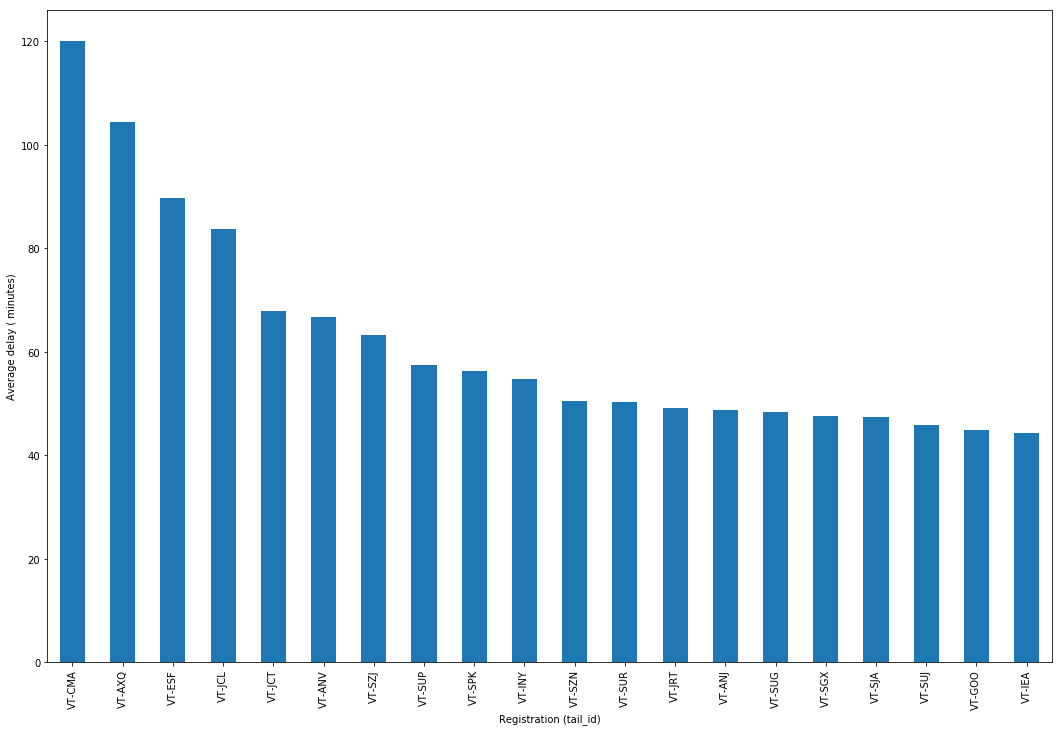

In [131]:
delayed_flights_0_min.groupby("reg").arrival_delay.mean().sort_values(ascending=False)[0:20].plot(kind="bar",figsize=(18,12))
plt.xlabel("Registration (tail_id)")
plt.ylabel("Average delay ( minutes)")

# Distribution of flight delays

### 1.Percentage of flights with  Less than  or equal to 15 minutes delay 

In [86]:
    (delayed_flights_0_min[delayed_flights_0_min.arrival_delay<=15].arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"]))*100

50.690018567772363

### 2.Percentage of  flights with  arrival delay greater than 15 min but less than 30 min

In [88]:
x=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>15][delayed_flights_0_min.arrival_delay<=30]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(x*100)

24.097957545


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 3. Percentage of flights with arrival delay greater than 30 min  but less than or equal to 60 min

In [89]:
y=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>30][delayed_flights_0_min.arrival_delay<=60]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(y*100)

16.3245847343


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 4. Percentage of flights with arrival delay greater than 60 min but less than or equal to 2 hours

In [90]:
z=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>60][delayed_flights_0_min.arrival_delay<=120]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(z*100)

6.7295629046


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 5.Percentage of  flight with arrival delay greater than 2 hour

In [91]:
p=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>120]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(p*100)

2.15787624831


In [31]:
q=delayed_flights_0_min.groupby("flight_number").arrival_delay.mean()

In [32]:
type(q)

pandas.core.series.Series

In [49]:
q[q>30].sort_values(ascending=False)[0:5]


flight_number
AI964    337.333333
2S102    268.444444
SG999    266.000000
6E523    238.000000
SG56     223.375000
Name: arrival_delay, dtype: float64

In [60]:
#print("flight {} flown  {} number of times".format("SG999",new_data[new_data.flight_number=="SG999"].origin.count()))

